# 1. Zadatak

In [1]:
import pandas as pd

In [2]:
data = pd.ExcelFile("2021_Junior Data Analyst_v2 2.xlsx")

In [3]:
dfs = {sheet_name: data.parse(sheet_name) 
          for sheet_name in data.sheet_names}

In [4]:
dfs["KPIs"].head()

,Date,Installs,Daily Active Users,Revenue
0,2016-01-19,18613,379041,38253.600921
1,2016-01-20,18975,379381,36994.498125
2,2016-01-21,18228,378956,37312.367840
3,2016-01-22,18187,378513,36301.983163
4,2016-01-23,18382,378284,36845.430775


In [5]:
import numpy as np

In [6]:
npDate = dfs["KPIs"]["Date"].to_numpy()
npInstalls = dfs["KPIs"]["Installs"].to_numpy()

Sljedeći graf prikazuje dnevni broj preuzimanja u ovisnosti o vremenu. 

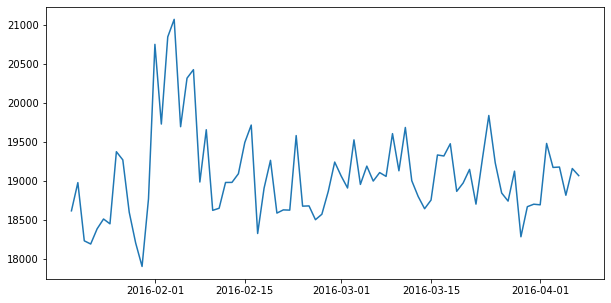

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(npDate, npInstalls)

plt.show()

In [8]:
npDAU = dfs["KPIs"]["Daily Active Users"].to_numpy()
npRevenue = dfs["KPIs"]["Revenue"].to_numpy()

Sljedeći graf prikazuje broj dnevno aktivnih korisnika u ovisnosi o vremenu. 

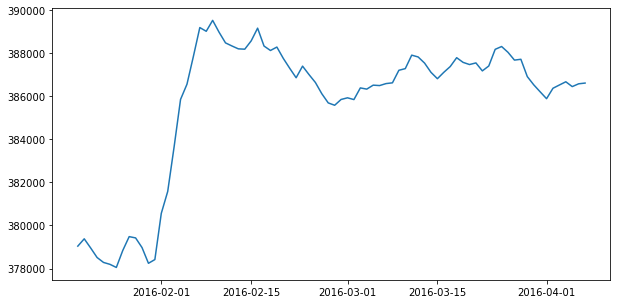

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(npDate, npDAU)

plt.show()

Sljedeći graf prikazuje dnevne prihode u ovisnosti o vremenu. 

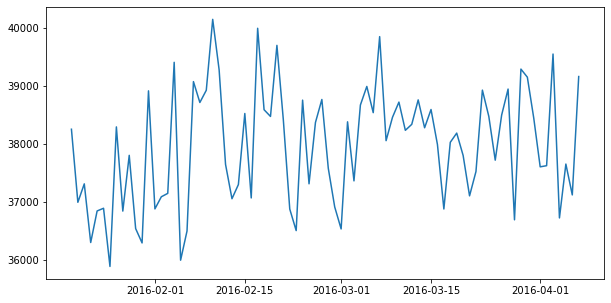

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(npDate, npRevenue)

plt.show()

Iz prethodnih grafova možemo primjetiti da je marketinška kampanja pozitivno utjecala na broj preuzimanja i broj dnevno aktivnih korisnika, također moglo bi se naslutiti da je pozitivno utjecala i na prihode. U grafovima primjećujemo velike dnevne oscilacije. Uzrok tih oscilacija su vjerojatno razlike između dana u tjednu (npr. nedjelja neradni dan...). Da bismo lakše uočili pravilnosti između podataka i izveli kvalitetnije zaključke, korisno bi bilo promatrati sve gornje podatke (prihodi, dnevni broj aktivnih korisnika, preuzimanja) na tjednoj bazi.

In [11]:
weeklyInstalls = []
pom = npInstalls[6:npInstalls.size - 4]

for i in range(10):
    num = 0
    for j in range(7):
        num += pom[7*i + j]
    num = num / 7
    weeklyInstalls.append(num)
    
weeks = [1,2,3,4,5,6,7,8,9,10]

Promotrimo prvo ovisnost broja preuzimanja o vremenu. Za razliku od prošlog grafa gdje smo broj preuzimanja promatrali na dnevnoj bazi i gledali kako se taj broj mijenja kako iz dana u dan, sada promatramo broj preuzimanja na tjednoj bazi. U promatranom skupu podataka imamo 10 tjedana. Kampanja je počela prvim danom 2. tjedna. <br>
Sljedeći graf prikazuje prosječan dnevni broj preuzimanja u nekom tjednu u ovisnosti o vremenu (tjednima, 1 na x-osi predstavlja prvi tjedan).

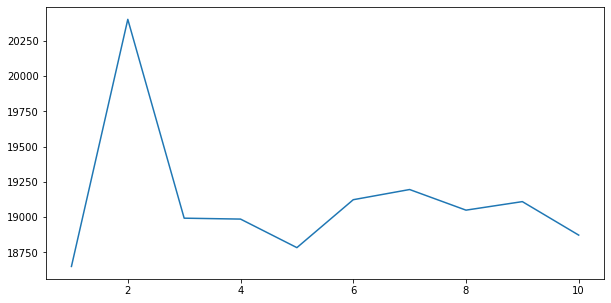

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(weeks, weeklyInstalls)

plt.show()

Na predhodnom grafu vidimo nagli porast broja preuzimanja u drugom tjednu (tjednu u kojem je započela kampanja). Nakon 2. tjedna broj preuzimanja se vraća na razinu na kojoj je bio prije kampanje (blago veći od toga).

In [13]:
weeklyDAU = []
pom = npDAU[6:npInstalls.size - 4]

for i in range(10):
    num = 0
    for j in range(7):
        num += pom[7*i + j]
    num = num / 7
    weeklyDAU.append(num)

Sljedeći graf prikazuje prosječan broj dnevno aktivnih korisnika u nekom tjednu u ovisnosti o vremenu.

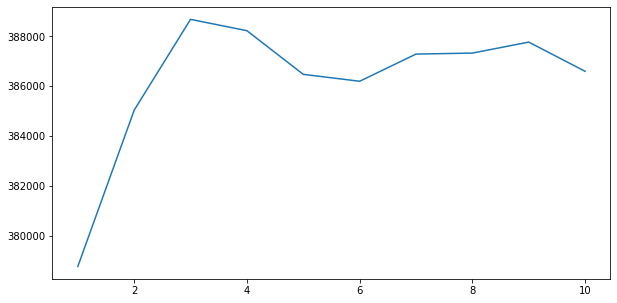

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(weeks, weeklyDAU)

plt.show()

Iz prethodnog grafa primjećujemo da je broj dnevno aktivnih korisnika narastao u drugom tjednu u odnosu na prvi, također raste i u trećem tjednu gdje doseže svoj maksimum. Broj dnevno aktivnih korisnika se kasnije zadržava na brojci koja je osjetno veća (za oko 2%) od brojke dnevno aktivnih korisnika prije marketinške kampanje.

In [15]:
weeklyRevenue = []
pom = npRevenue[6:npInstalls.size - 4]

for i in range(10):
    num = 0
    for j in range(7):
        num += pom[7*i + j]
    num = num / 7
    weeklyRevenue.append(num)

Sljedeći graf prikazuje prosječan dnevni prihod u nekom tjednu u ovisnosti o vremenu.

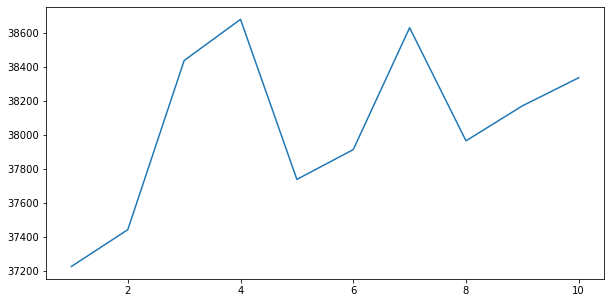

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(weeks, weeklyRevenue)

plt.show()

Iz prethodnog grafa primjećujemo izrazitiji porast prihoda u trećem tjednu (drugom nakon što je kampanja započela), ali prihodi se nisu zadržali na tim višim razinama nego su i padali (npr. u 5. tjednu). Sveukupno gledano može se primjetiti stabilni tjedni porast prihoda (oko 0.5%).

Odgovorimo sad na jednom mjestu kakvi su učinci kampanje. Dakle, kampanja je kao posljedicu imala porast broja preuzimanja (za nešto manje od 10% u odnosu na prethodni tjedan) u tjednu u kojem se odvijala. Taj porast broja preuzimanja u tjednu kampanje je uzrokavao veći broj dnevno aktivnih korisnika u dužem periodu nakon kampanje (porast za 2% u odnosu na tjedan prije kampanje). Međutim, iako je neposredno nakon kampanje broj dnevno aktivnih korisnika bio veći nego prije kampanje i stabilan iz tjedna u tjedan, prihodi se nisu ponašali na isti način. Uočili smo da, dugoročno, prihodi stabilno rastu.

Sljedeći graf prikazuje dnevni broj preuzimanja u ovisnosti o vremenu za pojedine zemlje.

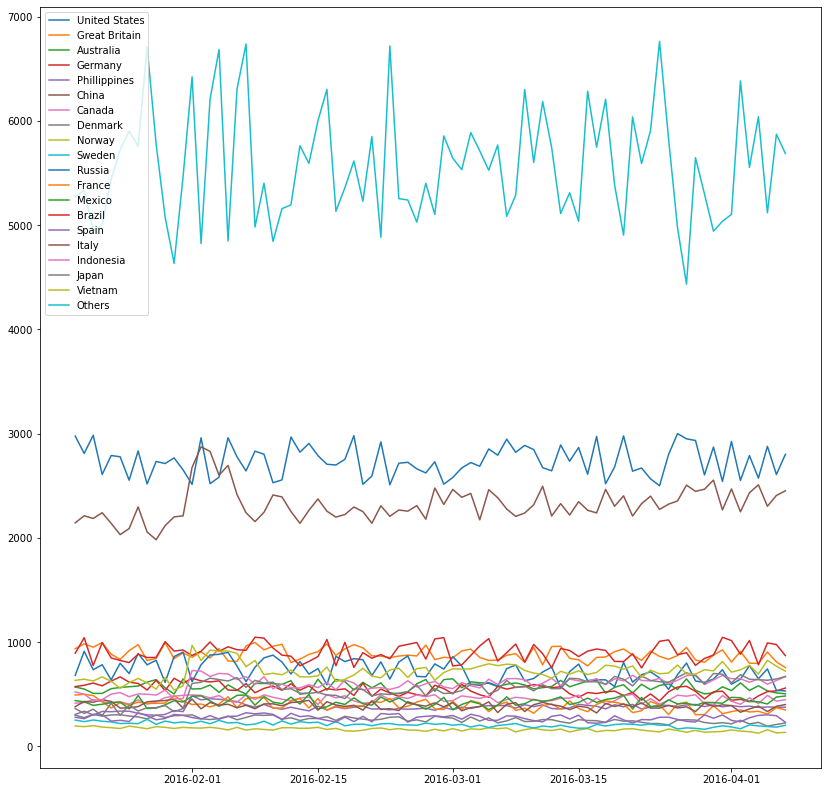

In [17]:
fig, ax = plt.subplots(figsize=(14,14))


for column in dfs["Installs"].columns[1:]:
    countryInstalls = dfs["Installs"][column].to_numpy()
    ax.plot(npDate, countryInstalls, label=column)
    
plt.legend(loc="upper left")
plt.show()

Ponovno primjećujemo da ovakve grafove neće biti jednostavno čitati, pa uklanjamo na isti način kao i prije dnevne oscilacije. Sljedeći graf prikazuje prosječni dnevni broj preuzimanja u nekom tjednu ovisno o vremenu za pojedinu zemlju.

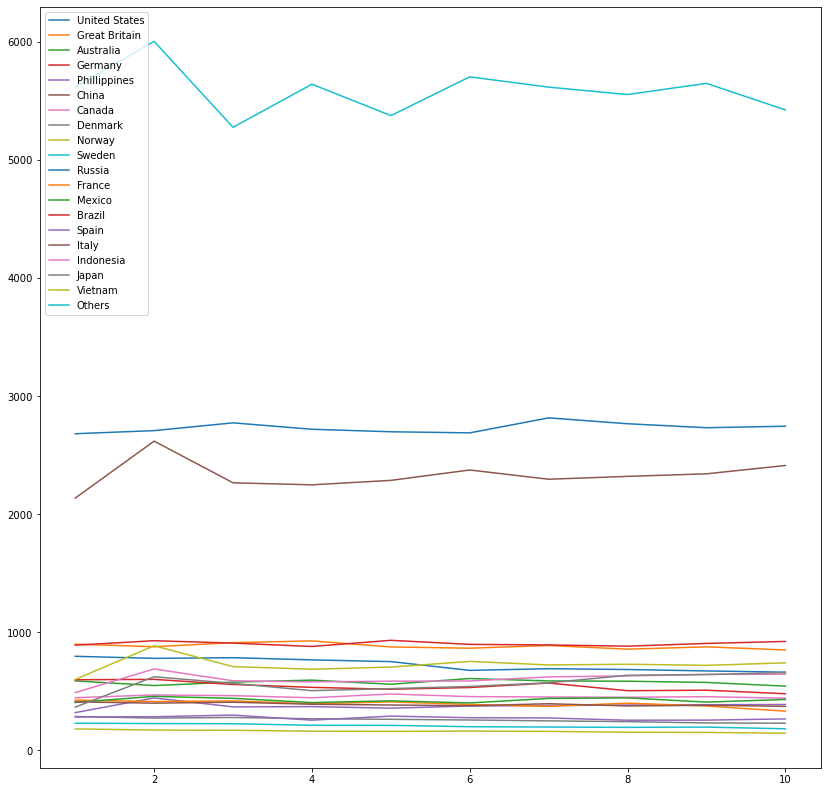

In [18]:
fig, ax = plt.subplots(figsize=(14,14))


for column in dfs["Installs"].columns[1:]:
    
    countryInstalls = dfs["Installs"][column].to_numpy()
    
    weeklyInstalls = []
    pom = countryInstalls[6:npInstalls.size - 4]

    for i in range(10):
        num = 0
        for j in range(7):
            num += pom[7*i + j]
        num = num / 7
        weeklyInstalls.append(num)
    
    
    ax.plot(weeks, weeklyInstalls, label=column)
    
plt.legend(loc="upper left")
plt.show()

Na sljedećem grafu vidimo prosječan broj dnevno aktivnih korisnika u nekom tjednu ovisno o vremenu za pojedinu zemlju.

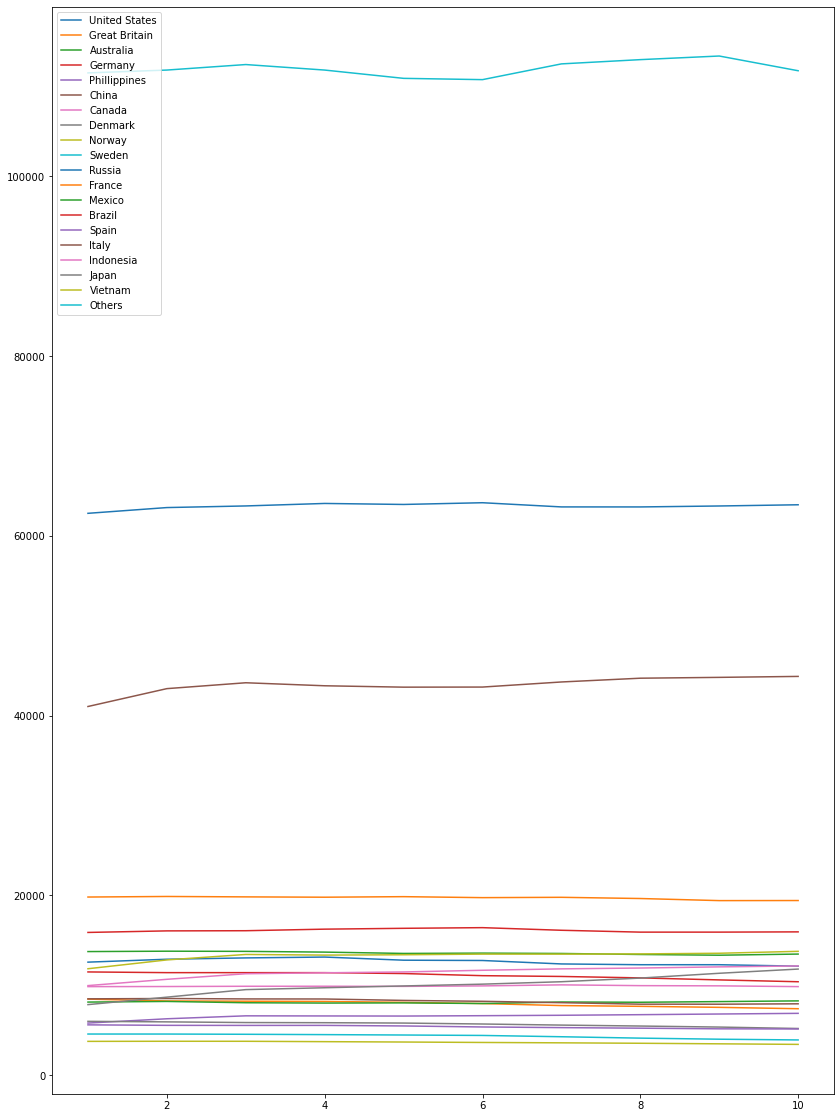

In [19]:
fig, ax = plt.subplots(figsize=(14,20))


for column in dfs["Daily Active Users"].columns[1:]:
    
    countryDAU = dfs["Daily Active Users"][column].to_numpy()
    
    weeklyDAU = []
    pom = countryDAU[6:npInstalls.size - 4]

    for i in range(10):
        num = 0
        for j in range(7):
            num += pom[7*i + j]
        num = num / 7
        weeklyDAU.append(num)
    
    
    ax.plot(weeks, weeklyDAU, label=column)
    
plt.legend(loc="upper left")
plt.show()

Na sljedećem grafu vidimo prosječne prihode u nekom tjednu ovisno o vremenu za pojedinu zemlju.

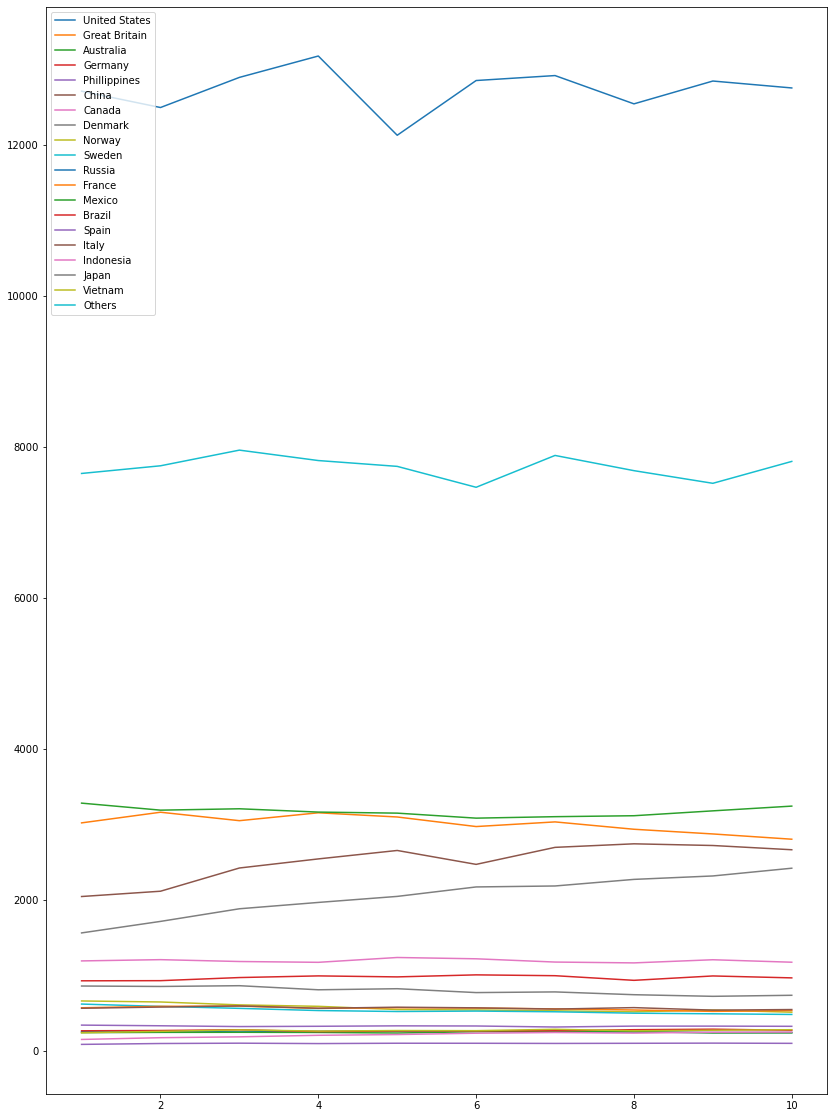

In [20]:
fig, ax = plt.subplots(figsize=(14,20))


for column in dfs["Revenue"].columns[1:]:
    
    countryRevenue = dfs["Revenue"][column].to_numpy()
    
    weeklyRevenue = []
    pom = countryRevenue[6:npInstalls.size - 4]

    for i in range(10):
        num = 0
        for j in range(7):
            num += pom[7*i + j]
        num = num / 7
        weeklyRevenue.append(num)
    
    
    ax.plot(weeks, weeklyRevenue, label=column)
    
plt.legend(loc="upper left")
plt.show()

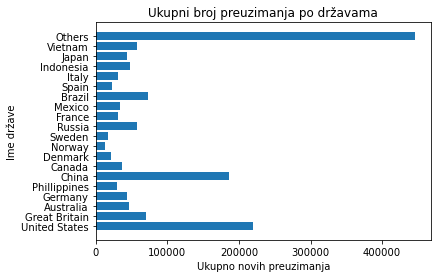

In [21]:
y_axis = []
x_axis = []

for column in dfs["Installs"].columns[1:]:
    
    y_axis.append(column)
    x_axis.append(dfs["Installs"][column].sum())

plt.barh(y_axis,x_axis)
plt.title('Ukupni broj preuzimanja po državama')
plt.ylabel('Ime države')
plt.xlabel('Ukupno novih preuzimanja')
plt.show()

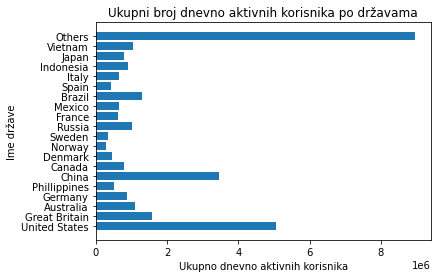

In [22]:
y_axis = []
x_axis = []

for column in dfs["Daily Active Users"].columns[1:]:
    
    y_axis.append(column)
    x_axis.append(dfs["Daily Active Users"][column].sum())

plt.barh(y_axis,x_axis)
plt.title('Ukupni broj dnevno aktivnih korisnika po državama')
plt.ylabel('Ime države')
plt.xlabel('Ukupno dnevno aktivnih korisnika')
plt.show()

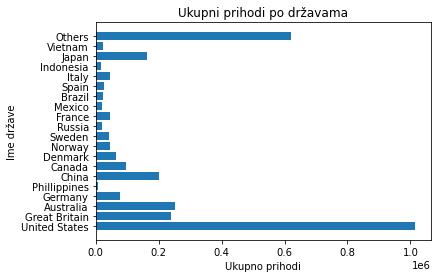

In [23]:
y_axis = []
x_axis = []

for column in dfs["Revenue"].columns[1:]:
    
    y_axis.append(column)
    x_axis.append(dfs["Revenue"][column].sum())

plt.barh(y_axis,x_axis)
plt.title('Ukupni prihodi po državama')
plt.ylabel('Ime države')
plt.xlabel('Ukupno prihodi')
plt.show()

Iz prethodnih podataka vidimo da su najznačajnije zemlje SAD, Australija, VB, Kina i Japan (najveći prihodi). Najpozitivnije trendove rasta od gore navedenih zemalja imaju Kina i Japan, pa njih možemo smatrati kao zemlje najznačajnije za rast prihoda od igrice. Također, možemo primjetiti da korisnici iz razvijenijih zemalja generiraju više prihoda. Kamapanja koju smo imali u 2. tjednu imala je najpozitivnije učinke u dalekoistočnim zemljama. Mislim da bi trebalo osmisliti neku drugu vrstu marketinške kampanje koja bi dovela do porasta broja korisnika (pa tako i prihoda) u Sjevernoj Americi i Europi.

# Zadatak 2

In [24]:
ab_test = pd.read_csv('2021_ABtest_data.csv')

In [25]:
ab_test.head()

,date,id,level,group,revenue
0,2017-08-01,1,16,-,0.00
1,2017-08-02,5,17,-,3.49
2,2017-08-03,5,18,-,0.00
3,2017-08-06,5,19,-,0.00
4,2017-08-07,5,19,Treatment,0.00


Pogledajmo prvo koliki su ukupni prihodi od korisnika koji su mogli koristiti novu znažajku i onih koji nisu, i koliko je ukupan broj takvih korisnika.

In [26]:
sum_treatment = 0
num_treatment = 0
sum_control = 0
num_control = 0
id_treatment = set()
id_control = set()

for index, row in ab_test.iterrows():
    
    if row['group'] == 'Treatment' and row['level'] > 9:
        
        sum_treatment += row['revenue']
        id_treatment.add( row['id'] )
        
    if row['group'] == 'Control' and row['level'] > 9:
        
        sum_control += row['revenue']
        id_control.add( row['id'] )
        
num_treatment = len( id_treatment )
num_control = len( id_control )

print( sum_treatment, num_treatment, sum_treatment/num_treatment )
print( sum_control, num_control, sum_control/num_control )

1662.530000000002 492 3.379126016260167
1172.320000000001 464 2.526551724137933


Ukupno imamo 492 korisnika koji su mogli koristiti novu značajku, a ukupni prihod od tih korisnika iznosi 1662.53, odnosno 3.38 dolara po korisniku. Korisnika koji nisu imali omogućenu novu značajku ima 464, a ukupni prihod od tih korisnika iznosi 1172.32, odnosno 2.53 dolara po korisniku.

In [27]:
(sum_treatment/num_treatment)/(sum_control/num_control)

1.337445809629381

Zabilježen je prosječni porast prihoda po korisniku koji su mogli koristiti novu značajku od 33.75% u odnosu na one koji nisu mogli koristiti novu značajku.

In [28]:
pom2 = 0
dict_treatment = dict()
dict_control = dict()

for index, row in ab_test.iterrows():
    
    if row['group'] == 'Treatment' and row['level'] > 9:
        
        if row['id'] in dict_treatment.keys():
            dict_treatment[row['id']] += row['revenue']
            
        else:
            dict_treatment[row['id']] = row['revenue']
        
    if row['group'] == 'Control' and row['level'] > 9:
        
        if row['id'] in dict_control.keys():
            dict_control[row['id']] += row['revenue']
            
        else:
            dict_control[row['id']] = row['revenue']
        
num_treatment = len( dict_treatment )
num_control = len( dict_control )

print(num_treatment, num_control)

492 464


In [29]:
treatment_distr = [0] * 25
control_distr = [0] * 25

for key in dict_treatment:
    
    for i in range(25):
        if dict_treatment[key] >= i*2 and dict_treatment[key] < (i+1)*2:
            treatment_distr[i] += 1
            break
            
for key in dict_control:
    
    for i in range(25):
        if dict_control[key] >= i*2 and dict_control[key] < (i+1)*2:
            control_distr[i] += 1
            break

<BarContainer object of 25 artists>

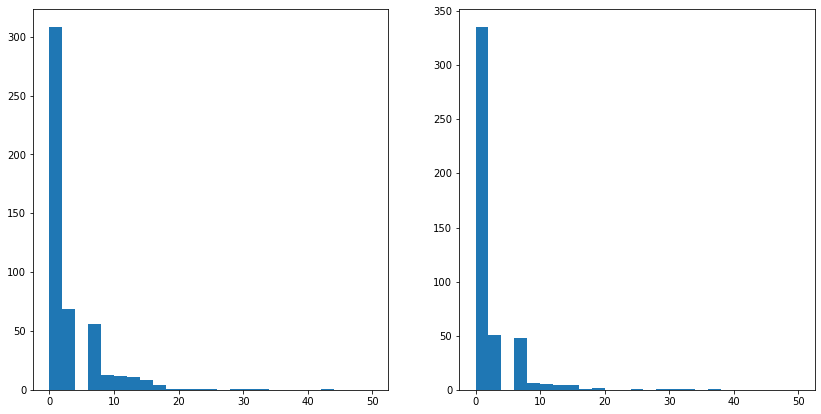

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

xs = [0] * 25

for i in range(25):
    xs[i] = i*2 + 1

axes[0].bar(xs, treatment_distr, 2, align='center')
axes[1].bar(xs, control_distr, 2, align='center')

Na prethodnim dijagramima vidimo frekvencije korisnika s obzirom na to koliko su novca potrošili na igrici (npr. možemo iščitati da ima najviše korisnika koji potroše od 0-2 dolara, te da dijagram sliči na eksponencijalnu distribuciju). Dijagrami izgledaju slično i ne primjećuju se nikakve nepravilnosti koje bi ukazivale na neke anomalije u podatcima koje bi nas mogle dovesti do pogrešnog zaključka.

In [31]:
treatment_distr = [0] * 25
control_distr = [0] * 25

for key in dict_treatment:
    
    if dict_treatment[key] >= 50:
        print(dict_treatment[key]) 
            
for key in dict_control:
    
    if dict_control[key] >= 50:
        print(dict_control[key]) 

50.95
83.96999999999998
69.99
69.99
76.96999999999998
69.99


Vidimo također da se prihodi od tri igrača koji generiraju najveći prihod (nisu bili uključeni u prethudni dijagram, pa ih promatramo posebno) neznatno razlikuju s obzirom u koju skupinu ti igrači pripadaju (sa ili bez značajke). Dakle rezultati koje smo dobili na početku nisu takvi zbog nekolicine igrača. 

U konačnici možemo zaključiti da je uvođenje nove značajke pozitivno utjecalo na rast prihoda, **te bi se ta značajka trebala omogućiti svim igračima**.

In [32]:
std = np.std( list( dict_treatment.values() ) )
std

7.424142681909857

Provjerimo još z-testom valjanost prethodnog zaključka:<br>

$$H_0: \lambda = 2.53$$
$$H_1: \lambda > 2.53$$

$$Z= \frac{\overline{X_n} - \mu_0}{\sigma}\sqrt{n} = \frac{3.37 - 2.53}{7.42}\sqrt{492} = 2.51$$

Budući da je $z_{0.001} = 2.33$, odbacujemo $H_0$ u korist $H_1$ sa sigurnošću od preko 99%. Dakle, i z-test potvrđuje da trebamo omogućiti značajku svim korisnicima.